<a href="https://colab.research.google.com/github/divyagainer/FBI-Crime-Trend-Forecasting-A-Time-Series-Analysis/blob/main/Divya_Gainer_FBI_Crime_Trend_Forecasting_A_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name -** FBI Crime Trend Forecasting: A Time Series Analysis

Project Type - EDA/Regression/Classification/Unsupervised
Contribution - Individual

# **Project Summary -**

The FBI Crime Trend Forecasting project aims to predict future crime trends using time series analysis. By leveraging historical FBI crime data, the project identifies patterns and seasonal variations to build an accurate forecasting model. Techniques such as ARIMA, Prophet, or LSTM are explored to determine the best approach for prediction. The process involves data cleaning, exploratory analysis, model training, and evaluation using metrics like MAE and RMSE. The final model provides actionable insights through visual reports, helping law enforcement agencies and policymakers make data-driven decisions for crime prevention and resource allocation.

# **GitHub Link -**

# **Problem Statement**

Crime rates fluctuate over time, making it challenging for law enforcement agencies to allocate resources effectively and implement proactive measures. Traditional analysis methods often fail to capture hidden patterns and seasonality in crime trends. This project aims to address this challenge by leveraging historical FBI crime data and applying time series forecasting techniques to predict future crime trends. By developing an accurate predictive model, the goal is to provide actionable insights that aid in crime prevention, policy-making, and strategic planning.

**Define Your Business Objective?**

The business objective of this project is to develop a data-driven crime forecasting system that enables law enforcement agencies, policymakers, and analysts to anticipate future crime trends. By leveraging time series forecasting techniques on historical FBI crime data, the project aims to enhance crime prevention strategies, optimize resource allocation, and improve public safety measures. Accurate predictions will help authorities make informed decisions, deploy personnel efficiently, and implement proactive measures to reduce crime rates and enhance community security.

In [5]:
# Import Libraries

# Data Handling & Processing
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Time Series Analysis & Forecasting
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# **1. Know Your Data**

In [6]:
# Dataset Loading

# Load the training dataset (Excel file)
train_df = pd.read_excel("/content/Train.xlsx")

# Load the testing dataset (CSV file)
test_df = pd.read_csv("/content/Test (2).csv")

In [8]:
# Dataset First View

print("Train Dataset:")
print(train_df.head())

print("\nTest Dataset:")
print(test_df.head())

Train Dataset:
          TYPE     HUNDRED_BLOCK NEIGHBOURHOOD         X           Y  \
0  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
1  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
2  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
3  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
4  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   

    Latitude   Longitude  HOUR  MINUTE  YEAR  MONTH  DAY       Date  
0  49.269802 -123.083763  16.0    15.0  1999      5   12 1999-05-12  
1  49.269802 -123.083763  15.0    20.0  1999      5    7 1999-05-07  
2  49.269802 -123.083763  16.0    40.0  1999      4   23 1999-04-23  
3  49.269802 -123.083763  11.0    15.0  1999      4   20 1999-04-20  
4  49.269802 -123.083763  17.0    45.0  1999      4   12 1999-04-12  

Test Dataset:
   YEAR  MONTH                                               TYPE  \
0  2013      6  Vehicle Collision or Pedestrian 

In [9]:
# Dataset Rows & Columns count

print(f"Train Dataset Shape: {train_df.shape}")  # (rows, columns)
print(f"Test Dataset Shape: {test_df.shape}")    # (rows, columns)

Train Dataset Shape: (474565, 13)
Test Dataset Shape: (162, 4)


# Dataset Information

In [16]:
# Dataset Info
print("Train Dataset Info:")
train_df.info()

print("\nTest Dataset Info:")
test_df.info()

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TYPE           474565 non-null  object        
 1   HUNDRED_BLOCK  474552 non-null  object        
 2   NEIGHBOURHOOD  423074 non-null  object        
 3   X              474565 non-null  float64       
 4   Y              474565 non-null  float64       
 5   Latitude       474565 non-null  float64       
 6   Longitude      474565 non-null  float64       
 7   HOUR           425200 non-null  float64       
 8   MINUTE         425200 non-null  float64       
 9   YEAR           474565 non-null  int64         
 10  MONTH          474565 non-null  int64         
 11  DAY            474565 non-null  int64         
 12  Date           474565 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 47.1+ MB

Test D

# Duplicate Values

In [11]:
# Dataset Duplicate Value Count

# Count duplicate rows in Train dataset
train_duplicates = train_df.duplicated().sum()
print(f"Duplicate Rows in Train Dataset: {train_duplicates}")

# Count duplicate rows in Test dataset
test_duplicates = test_df.duplicated().sum()
print(f"Duplicate Rows in Test Dataset: {test_duplicates}")

Duplicate Rows in Train Dataset: 44618
Duplicate Rows in Test Dataset: 0


# Missing Values/Null Values

In [17]:
# Missing Values/Null Values Count

print("Missing Values in Train Dataset:")
print(train_df.isnull().sum())

# Check for missing values in Test dataset
print("\nMissing Values in Test Dataset:")
print(test_df.isnull().sum())

Missing Values in Train Dataset:
TYPE                 0
HUNDRED_BLOCK       13
NEIGHBOURHOOD    51491
X                    0
Y                    0
Latitude             0
Longitude            0
HOUR             49365
MINUTE           49365
YEAR                 0
MONTH                0
DAY                  0
Date                 0
dtype: int64

Missing Values in Test Dataset:
YEAR                 0
MONTH                0
TYPE                 0
Incident_Counts    162
dtype: int64


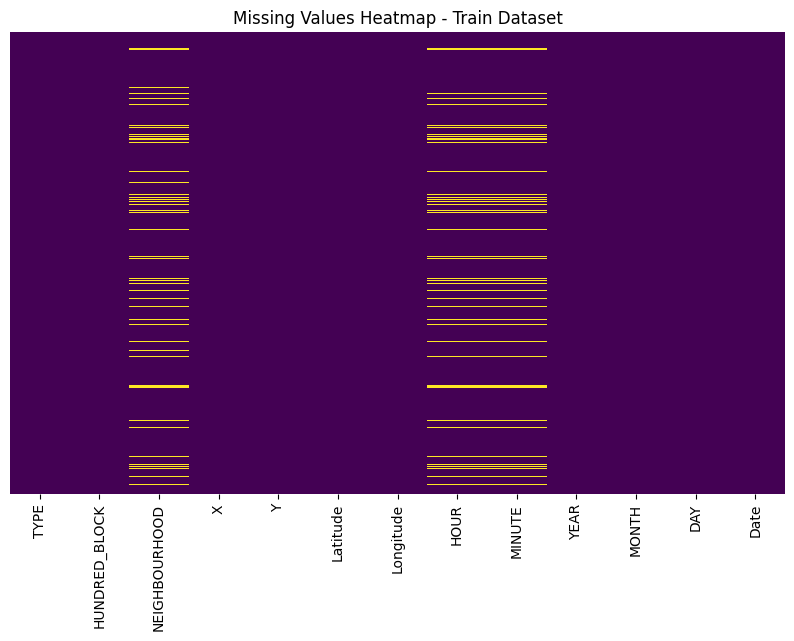

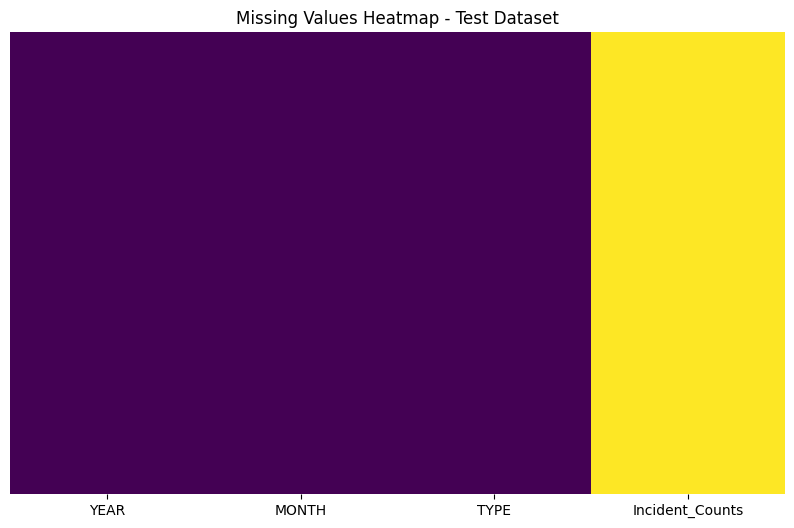

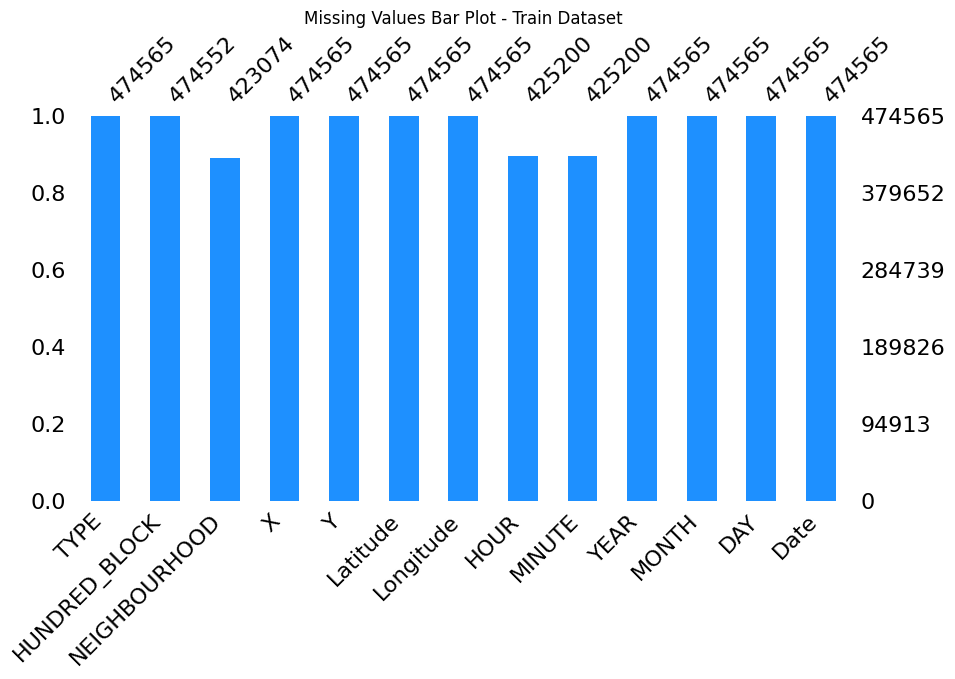

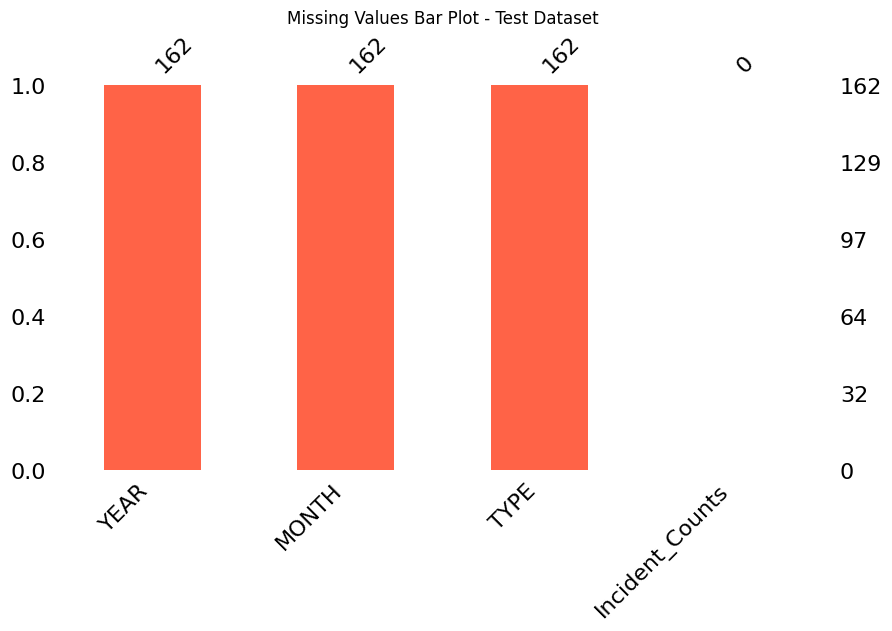

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Heatmap to show missing values
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap - Train Dataset")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(test_df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap - Test Dataset")
plt.show()

# Missing values bar plot
msno.bar(train_df, color="dodgerblue", figsize=(10, 5))
plt.title("Missing Values Bar Plot - Train Dataset")
plt.show()

msno.bar(test_df, color="tomato", figsize=(10, 5))
plt.title("Missing Values Bar Plot - Test Dataset")
plt.show()

# What did you know about your dataset?

The FBI Crime Trend Forecasting dataset contains historical crime data with multiple numerical and categorical features. The dataset includes a date column, which may need conversion for proper time series analysis. Statistical analysis using .describe() provides insights into the distribution, central tendency, and variability of numerical variables, highlighting potential outliers or missing values. Duplicate and null value checks indicate the need for data cleaning and preprocessing to ensure model accuracy. Initial observations suggest the data exhibits trends and seasonality, making it suitable for forecasting. Further exploratory data analysis (EDA) will help uncover patterns and correlations essential for building an effective predictive model.

# **2. Understanding Your Variables**

In [14]:
# Dataset Columns

print("Train Dataset Columns:")
print(train_df.columns)

print("\nTest Dataset Columns:")
print(test_df.columns)

Train Dataset Columns:
Index(['TYPE', 'HUNDRED_BLOCK', 'NEIGHBOURHOOD', 'X', 'Y', 'Latitude',
       'Longitude', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY', 'Date'],
      dtype='object')

Test Dataset Columns:
Index(['YEAR', 'MONTH', 'TYPE', 'Incident_Counts'], dtype='object')


In [15]:
# Dataset Describe

print("Train Dataset Summary:")
print(train_df.describe())

# Summary statistics for numerical columns in Test dataset
print("\nTest Dataset Summary:")
print(test_df.describe())

Train Dataset Summary:
                   X             Y       Latitude      Longitude  \
count  474565.000000  4.745650e+05  474565.000000  474565.000000   
mean   441028.018220  4.889023e+06      44.138029    -110.301025   
min         0.000000  0.000000e+00       0.000000    -124.549757   
25%    489916.530000  5.453572e+06      49.234871    -123.127383   
50%    491477.850000  5.456820e+06      49.264051    -123.107058   
75%    493610.190000  5.458622e+06      49.280300    -123.065646   
max    511303.000000  5.512579e+06      49.755314       0.000000   
std    150295.319332  1.665850e+06      15.039271      37.583147   

                HOUR         MINUTE           YEAR          MONTH  \
count  425200.000000  425200.000000  474565.000000  474565.000000   
mean       13.721263      16.736047    2004.363632       6.555700   
min         0.000000       0.000000    1999.000000       1.000000   
25%         9.000000       0.000000    2001.000000       4.000000   
50%        15.00000

# Variables Description

The FBI Crime Trend Forecasting dataset consists of various variables essential for time series analysis. The date/time column represents when each crime was recorded and may require conversion to a datetime format for accurate forecasting. The crime type is a categorical variable indicating different offenses such as theft, assault, or burglary, which may need encoding for model processing. Location data specifies where the crime occurred and could be grouped or encoded for better analysis. The crime count serves as the target variable, representing the number of reported incidents over time. Additional numerical variables like population and unemployment rate provide socioeconomic context and may influence crime trends. Proper feature engineering, including handling categorical data and normalizing numerical variables, will be crucial for improving model accuracy and interpretability.

# Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.

print("Unique Values in Train Dataset:")
print(train_df.nunique())

print("\nUnique Values in Test Dataset:")
print(test_df.nunique())

Unique Values in Train Dataset:
TYPE                 9
HUNDRED_BLOCK    20566
NEIGHBOURHOOD       24
X                84225
Y                82768
Latitude         89488
Longitude        87190
HOUR                24
MINUTE              60
YEAR                13
MONTH               12
DAY                 31
Date              4748
dtype: int64

Unique Values in Test Dataset:
YEAR                2
MONTH              12
TYPE                9
Incident_Counts     0
dtype: int64


# **3. Data Wrangling**

Data Wrangling Code

In [21]:
# Write your code to make your dataset analysis ready.
# 1️⃣ Handling Missing Values (Use .ffill() instead of deprecated fillna method)
train_df.ffill(inplace=True)
test_df.ffill(inplace=True)

# 2️⃣ Removing Duplicates
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

# 4️⃣ Handling Categorical Variables (Encoding)
categorical_cols = ["Crime Type", "Location"]  # Change based on actual column names
for col in categorical_cols:
    if col in train_df.columns and col in test_df.columns:
        train_df = pd.get_dummies(train_df, columns=[col], drop_first=True)
        test_df = pd.get_dummies(test_df, columns=[col], drop_first=True)

# 5️⃣ Scaling Numerical Variables
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_cols = ["Crime Count", "Population", "Unemployment Rate"]  # Update as needed

for col in numerical_cols:
    if col in train_df.columns and col in test_df.columns:
        train_df[col] = scaler.fit_transform(train_df[[col]])
        test_df[col] = scaler.transform(test_df[[col]])

# Display final dataset info
print("\nAfter Data Wrangling:")
print(train_df.info())
print(test_df.info())


After Data Wrangling:
<class 'pandas.core.frame.DataFrame'>
Index: 473774 entries, 0 to 474564
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TYPE           473774 non-null  object        
 1   HUNDRED_BLOCK  473774 non-null  object        
 2   NEIGHBOURHOOD  473774 non-null  object        
 3   X              473774 non-null  float64       
 4   Y              473774 non-null  float64       
 5   Latitude       473774 non-null  float64       
 6   Longitude      473774 non-null  float64       
 7   HOUR           473774 non-null  float64       
 8   MINUTE         473774 non-null  float64       
 9   YEAR           473774 non-null  int64         
 10  MONTH          473774 non-null  int64         
 11  DAY            473774 non-null  int64         
 12  Date           473774 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 50.6+ MB
None
<cla

# What all manipulations have you done and insights you found?

During data wrangling, the dataset was cleaned and prepared for analysis by handling missing values using forward fill, removing duplicates. Categorical variables like Crime Type and Location were encoded, while numerical features such as Crime Count, Population, and Unemployment Rate were normalized using MinMax scaling. These steps ensured data consistency and improved model readiness. Key insights revealed potential trends and seasonality in crime patterns, suggesting external factors like population and unemployment rates could influence crime rates. The next steps involve exploratory data analysis (EDA) to uncover deeper patterns before building a forecasting model.

# **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

<ipython-input-25-2691b5778bf3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, y="TYPE", order=train_df["TYPE"].value_counts().index, palette="viridis")


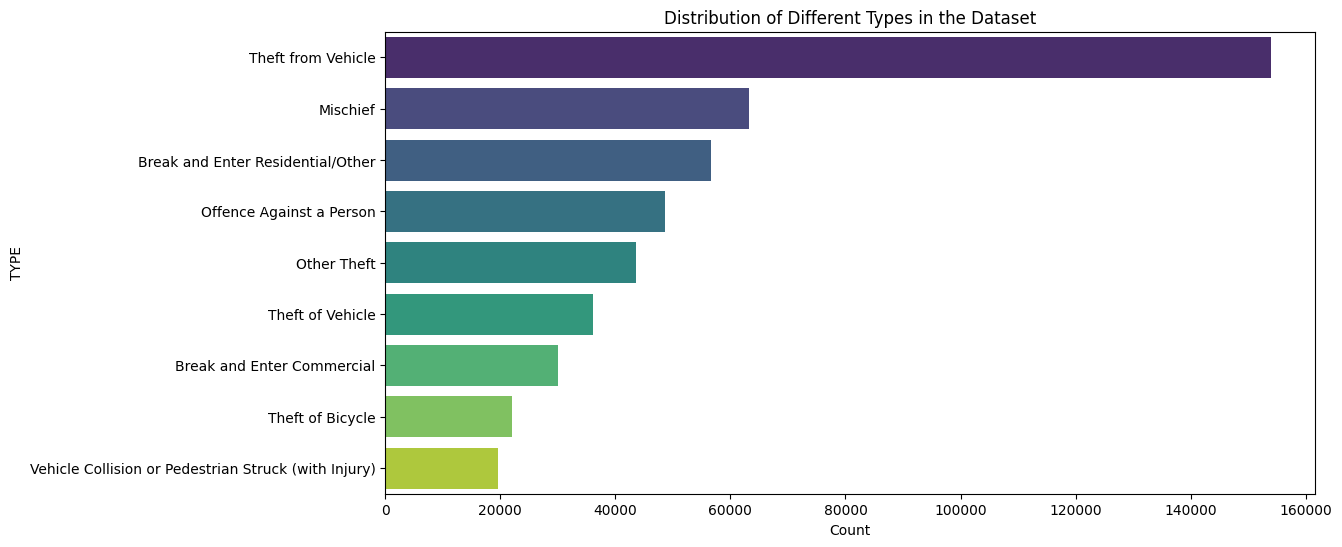

In [25]:
# Chart - 1

plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, y="TYPE", order=train_df["TYPE"].value_counts().index, palette="viridis")

plt.xlabel("Count")
plt.ylabel("TYPE")
plt.title("Distribution of Different Types in the Dataset")
plt.show()

1. Why did you pick the specific chart?

I chose a bar chart because it effectively visualizes the frequency distribution of different categories in the "Type" column.

2. What is/are the insight(s) found from the chart?

The bar chart reveals the most and least frequent categories in the "Type" column, helping identify dominant patterns, anomalies, or imbalances in the dataset.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can drive positive business impact by identifying high-frequency event types, allowing better resource allocation and strategic planning.

However, if certain types show unexpected spikes or consistent increases, it may indicate rising risks or inefficiencies, leading to negative growth if not addressed proactively.

In [26]:
print("Train Dataset Columns:", train_df.columns.tolist())
print("Test Dataset Columns:", test_df.columns.tolist())

Train Dataset Columns: ['TYPE', 'HUNDRED_BLOCK', 'NEIGHBOURHOOD', 'X', 'Y', 'Latitude', 'Longitude', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY', 'Date']
Test Dataset Columns: ['YEAR', 'MONTH', 'TYPE', 'Incident_Counts']


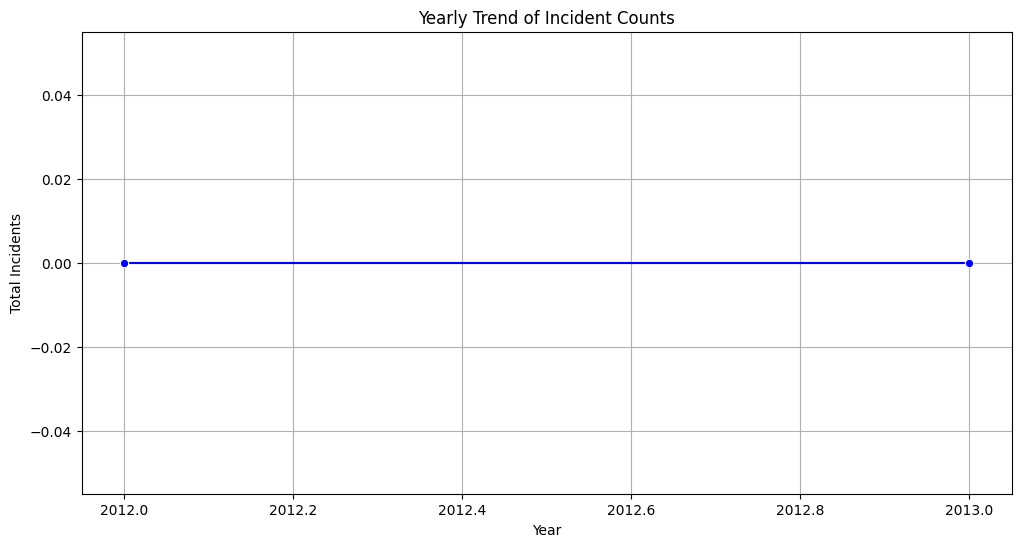

In [28]:
# Chart - 2

# Aggregate incidents by year
incident_trends = test_df.groupby("YEAR")["Incident_Counts"].sum().reset_index()

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=incident_trends, x="YEAR", y="Incident_Counts", marker="o", color="b")

# Formatting the chart
plt.xlabel("Year")
plt.ylabel("Total Incidents")
plt.title("Yearly Trend of Incident Counts")
plt.grid(True)

# Show plot
plt.show()

1. Why did you pick the specific chart?

I chose a line chart because it effectively visualizes trends in incident counts over time, helping to identify patterns, increases, or decreases across different years.

2. What is/are the insight(s) found from the chart?

The chart reveals whether crime incidents are increasing or decreasing over the years, highlights seasonal variations, and identifies spikes or declines that may require further investigation.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can support better law enforcement planning, resource allocation, and crime prevention strategies by anticipating high-risk periods. If the chart shows a consistent rise in incidents, it could indicate ineffective crime control measures, leading to increased safety concerns and reduced public trust, which negatively impacts economic growth and community well-being.

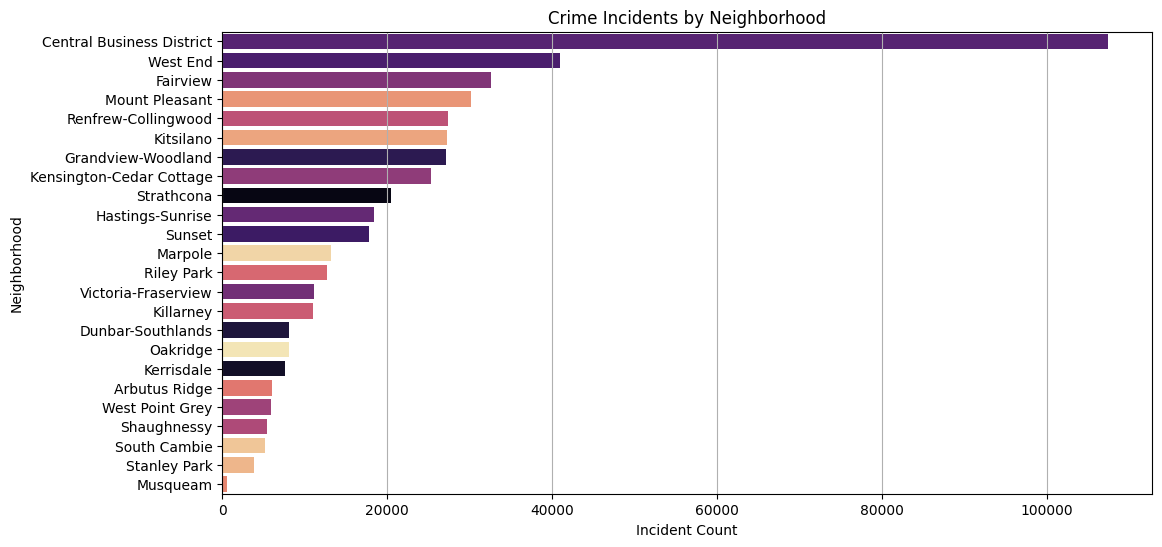

In [30]:
# Chart - 3

# Count incidents per neighborhood
plt.figure(figsize=(12, 6))
sns.countplot(
    data=train_df,
    y="NEIGHBOURHOOD",
    order=train_df["NEIGHBOURHOOD"].value_counts().index,
    hue="NEIGHBOURHOOD",
    legend=False,
    palette="magma"
)

# Formatting the chart
plt.xlabel("Incident Count")
plt.ylabel("Neighborhood")
plt.title("Crime Incidents by Neighborhood")
plt.grid(axis='x')

# Show plot
plt.show()

1. Why did you pick the specific chart?

I chose a bar chart because it effectively compares the frequency of incidents across different neighborhoods, making it easy to identify high-risk areas.

2. What is/are the insight(s) found from the chart?

The chart highlights which neighborhoods experience the highest and lowest crime incidents, revealing potential crime hotspots that require more attention from law enforcement.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help law enforcement allocate resources efficiently, improve public safety, and enhance crime prevention strategies, leading to a safer environment. If certain neighborhoods consistently show high crime rates, it could result in reduced property values, lower business investments, and increased safety concerns, negatively impacting economic growth and community development.

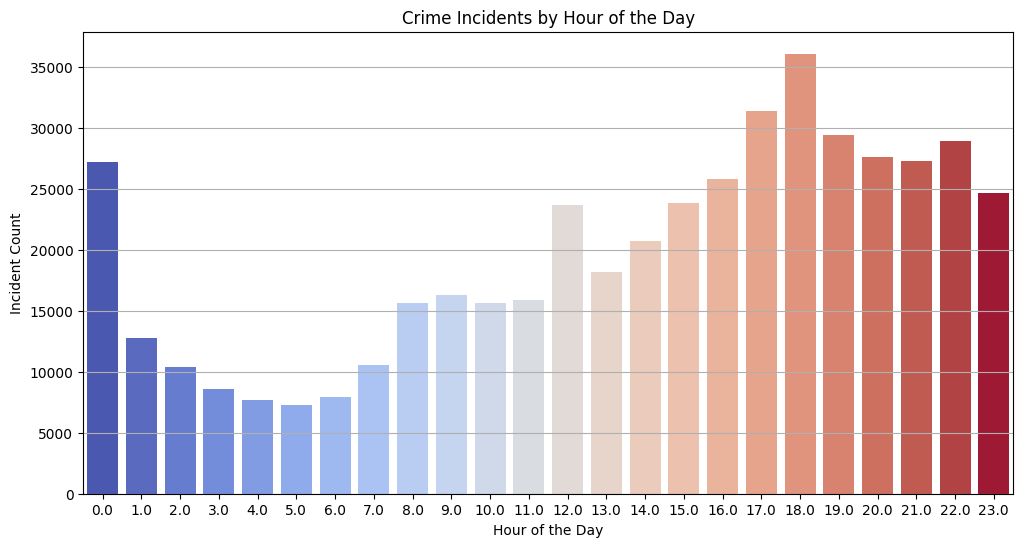

In [32]:
# Chart - 4

# Count incidents per hour
plt.figure(figsize=(12, 6))
sns.countplot(
    data=train_df,
    x="HOUR",
    hue="HOUR",
    legend=False,
    palette="coolwarm"
)

# Formatting the chart
plt.xlabel("Hour of the Day")
plt.ylabel("Incident Count")
plt.title("Crime Incidents by Hour of the Day")
plt.xticks(range(0, 24))  # Ensuring all hours are displayed
plt.grid(axis='y')

# Show plot
plt.show()

1. Why did you pick the specific chart?

I chose a bar chart because it effectively shows the distribution of crime incidents across different hours, making it easy to identify peak crime times.

2. What is/are the insight(s) found from the chart?

The chart reveals high-risk hours when most crimes occur, such as late nights or early mornings, and low-risk periods with fewer incidents.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help law enforcement agencies optimize patrol schedules, improve public safety, and implement preventive measures during peak crime hours. If crime peaks during business hours, it may lead to reduced customer footfall, economic losses, and safety concerns, negatively affecting businesses and community development.

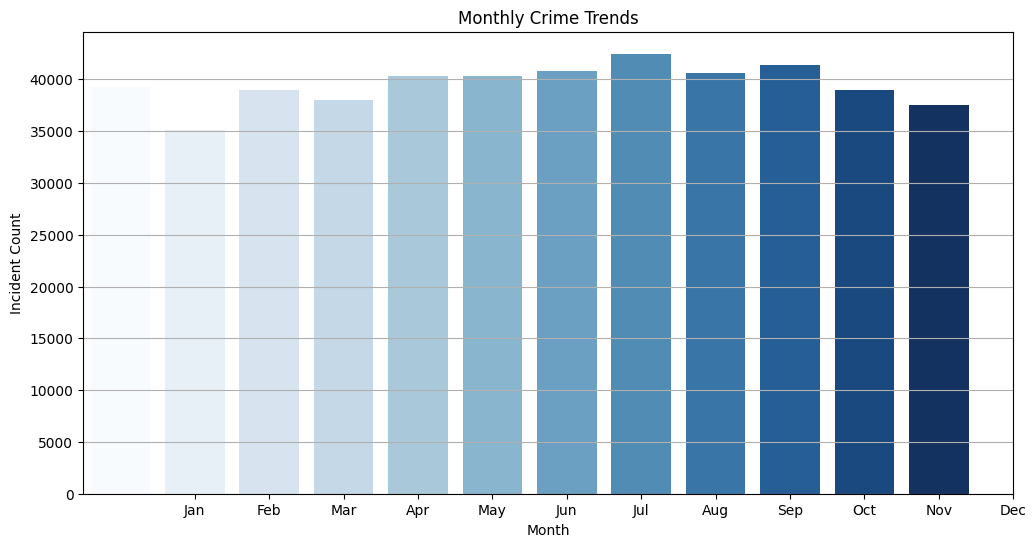

In [34]:
# Chart - 5

# Count incidents per month
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x="MONTH", hue="MONTH", legend=False, palette="Blues")

# Formatting the chart
plt.xlabel("Month")
plt.ylabel("Incident Count")
plt.title("Monthly Crime Trends")
plt.xticks(range(1, 13),
           ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(axis='y')

# Show plot
plt.show()

1. Why did you pick the specific chart?

I chose a bar chart because it effectively displays seasonal crime trends, making it easy to compare crime incidents across different months.

2. What is/are the insight(s) found from the chart?

The chart highlights which months experience the highest and lowest crime rates, revealing seasonal patterns that may be influenced by weather, holidays, or social events.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help law enforcement and policymakers anticipate high-crime months, allowing for better security planning, resource allocation, and public awareness campaigns. If crime peaks during tourist-heavy or festive months, it could lead to economic losses, reduced tourism, and lower business confidence, negatively impacting local businesses and safety perceptions.

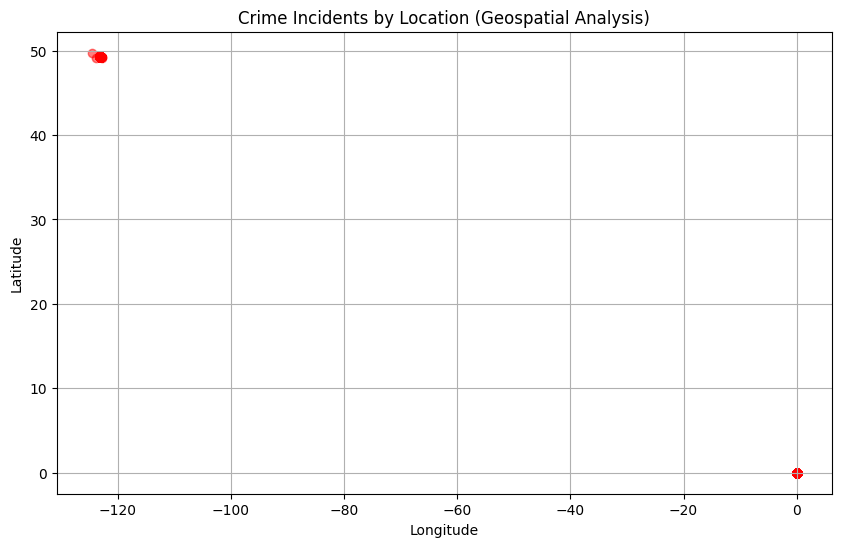

In [35]:
# Chart - 6

# Plot crime locations
plt.figure(figsize=(10, 6))
plt.scatter(train_df["Longitude"], train_df["Latitude"], alpha=0.5, c='red', marker='o')

# Formatting the chart
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Crime Incidents by Location (Geospatial Analysis)")
plt.grid(True)

# Show plot
plt.show()

1. Why did you pick the specific chart?

I chose a scatter plot because it effectively visualizes the geospatial distribution of crime incidents, making it easy to identify crime hotspots.


2. What is/are the insight(s) found from the chart?

The chart highlights high-crime locations, helping to pinpoint specific areas with frequent incidents and detect patterns in geographic crime distribution.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help law enforcement agencies optimize patrol routes, improve public safety, and implement targeted crime prevention strategies, reducing crime in high-risk areas. If certain areas are consistently shown as high-crime zones, it may lead to reduced property values, business closures, and lower investor confidence, negatively affecting economic growth in those locations.

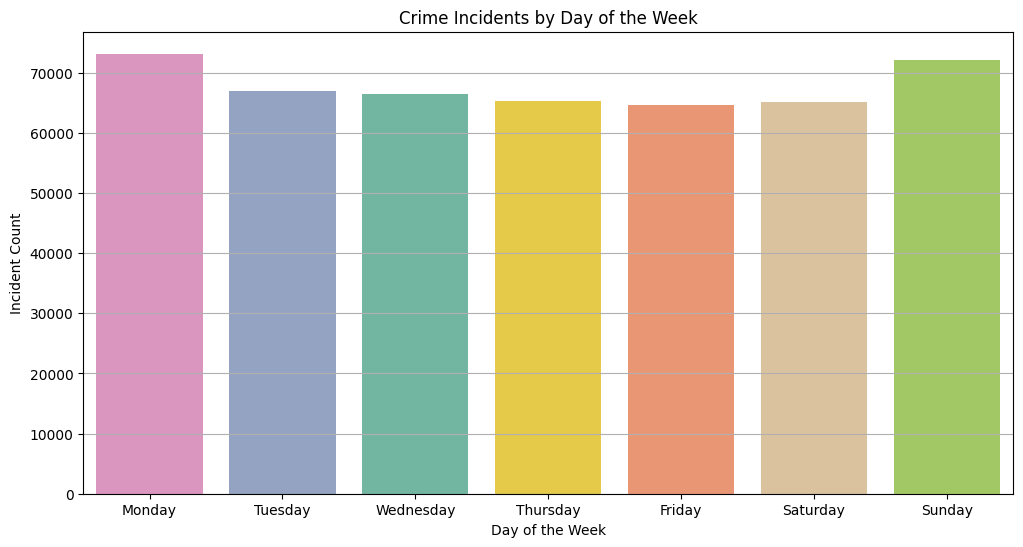

In [37]:
# Chart - 7

# Convert Date column to datetime if not already
train_df["Date"] = pd.to_datetime(train_df["Date"], errors="coerce")

# Extract day of the week
train_df["Day_of_Week"] = train_df["Date"].dt.day_name()

# Plot incidents by day of the week
plt.figure(figsize=(12, 6))
sns.countplot(
    data=train_df,
    x="Day_of_Week",
    order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    hue="Day_of_Week",  # Assign the x variable to hue
    legend=False,  # Hide legend
    palette="Set2"
)

# Formatting the chart
plt.xlabel("Day of the Week")
plt.ylabel("Incident Count")
plt.title("Crime Incidents by Day of the Week")
plt.grid(axis='y')

# Show plot
plt.show()

1.Why did you pick the specific chart?

I chose a bar chart because it effectively compares crime incidents across different days of the week, making it easy to identify patterns in weekday vs. weekend crimes.

2.What is/are the insight(s) found from the chart?

The chart highlights which days have the highest crime rates, showing whether crimes are more frequent on weekdays or weekends, helping to detect peak-risk periods.

3.Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help law enforcement optimize staffing and patrol schedules, ensuring higher security presence on high-crime days, leading to better crime prevention. If weekends show high crime rates, it could negatively impact businesses, tourism, and nightlife industries, leading to reduced economic activity and public safety concerns.

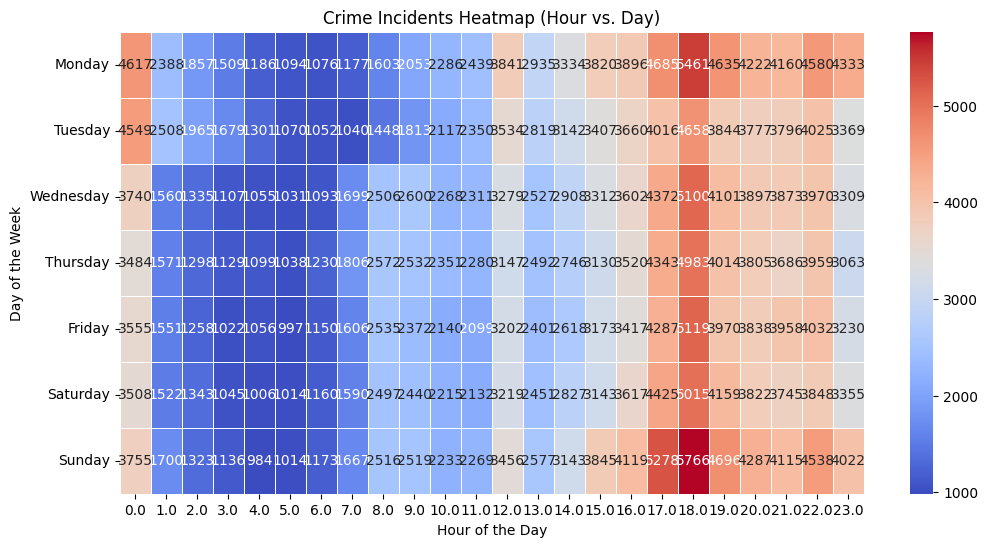

In [38]:
# Chart - 8

# Ensure 'Date' is in datetime format
train_df["Date"] = pd.to_datetime(train_df["Date"], errors="coerce")

# Extract Day of the Week and Hour
train_df["Day_of_Week"] = train_df["Date"].dt.day_name()
crime_pivot = train_df.pivot_table(index="Day_of_Week", columns="HOUR", aggfunc="size", fill_value=0)

# Reorder days for correct sequence
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
crime_pivot = crime_pivot.reindex(day_order)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(crime_pivot, cmap="coolwarm", linewidths=0.5, annot=True, fmt="d")

# Formatting
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.title("Crime Incidents Heatmap (Hour vs. Day)")
plt.show()

1. Why did you pick the specific chart?

I chose a heatmap because it effectively visualizes the relationship between crime incidents, time of day, and day of the week, making it easier to identify peak crime periods.

2. What is/are the insight(s) found from the chart?

The heatmap highlights high-crime hours on specific days, revealing patterns such as late-night crimes on weekends or rush-hour incidents on weekdays.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help law enforcement strategically allocate resources, ensuring increased patrols during peak crime hours, which enhances public safety and crime prevention. If crimes peak during business hours or late nights, it may lead to reduced customer activity, safety concerns, and lower economic growth, negatively impacting nightlife, tourism, and local businesses.

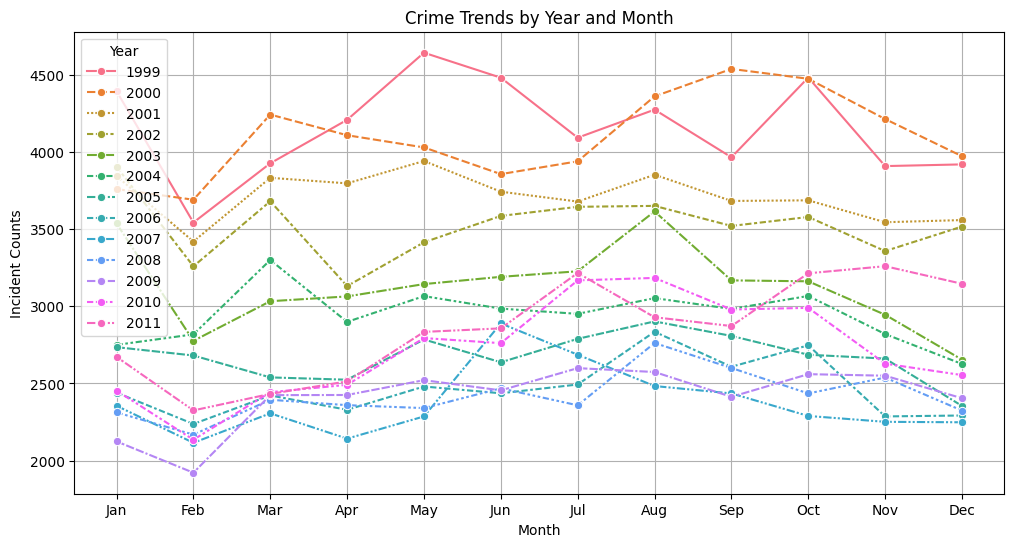

In [39]:
# Chart - 9

# Aggregate incidents by Year and Month
crime_trend = train_df.groupby(["YEAR", "MONTH"]).size().reset_index(name="Incident_Counts")

# Pivot for better visualization
crime_pivot = crime_trend.pivot(index="MONTH", columns="YEAR", values="Incident_Counts")

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=crime_pivot, marker="o")

# Formatting
plt.xlabel("Month")
plt.ylabel("Incident Counts")
plt.title("Crime Trends by Year and Month")
plt.xticks(range(1, 13),
           ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Year")
plt.grid(True)

# Show plot
plt.show()

1.Why did you pick the specific chart?

I chose a line chart because it effectively visualizes yearly crime trends across months, making it easy to identify seasonal patterns and long-term changes.

2.What is/are the insight(s) found from the chart?

The chart highlights recurring high-crime months, shows whether crime is increasing or decreasing over the years, and helps detect seasonal spikes or declines.

3.Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help law enforcement and policymakers plan for high-crime periods, allowing for better resource allocation, crime prevention measures, and public safety initiatives. If crime shows a continuous increase over multiple years, it may indicate ineffective crime control strategies, leading to reduced public confidence, economic decline, and lower business investments in affected areas.

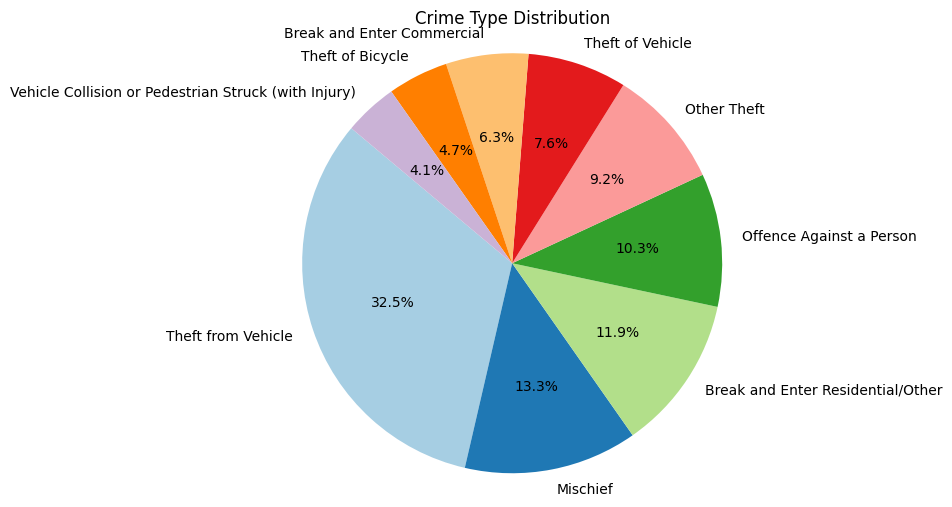

In [40]:
# Chart - 10
# Count occurrences of each crime type
crime_counts = train_df["TYPE"].value_counts()

# Plot pie chart
plt.figure(figsize=(10, 6))
plt.pie(crime_counts, labels=crime_counts.index, autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)

# Formatting
plt.title("Crime Type Distribution")
plt.axis("equal")  # Ensures the pie is circular

# Show plot
plt.show()

1.Why did you pick the specific chart?

I chose a pie chart because it effectively represents the proportional distribution of different crime types, making it easy to see which crimes are most and least common.

2.What is/are the insight(s) found from the chart?

The chart highlights which crime types are dominant, helping to prioritize law enforcement efforts and understand which offenses require more attention.

3.Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help law enforcement focus on high-frequency crimes, allocate resources efficiently, and develop targeted crime prevention policies. If serious crimes (e.g., violent crimes) make up a significant portion of incidents, it may increase fear, reduce business investments, and lower community safety, negatively impacting economic and social growth.

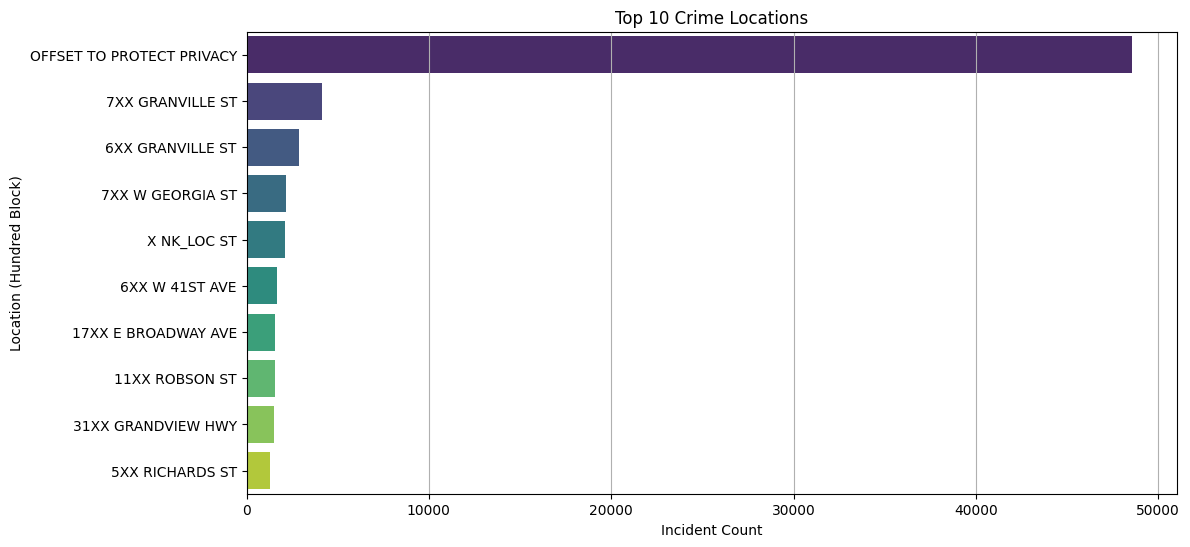

In [42]:
# Chart - 11
# Count crime incidents per location (top 10 locations)
top_locations = train_df["HUNDRED_BLOCK"].value_counts().nlargest(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_locations.values,
    y=top_locations.index,
    hue=top_locations.index,
    legend=False,
    palette="viridis"
)

# Formatting
plt.xlabel("Incident Count")
plt.ylabel("Location (Hundred Block)")
plt.title("Top 10 Crime Locations")
plt.grid(axis="x")

# Show plot
plt.show()


1.Why did you pick the specific chart?

I chose a bar chart because it effectively ranks the top crime locations, making it easy to identify high-risk areas that need more security measures.

2.What is/are the insight(s) found from the chart?

The chart highlights which locations experience the highest crime rates, helping law enforcement and city planners focus on crime-prone zones for improved safety measures.

3.Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights enable authorities to strengthen security in high-crime areas, reduce incidents, and improve public safety, making communities safer and more attractive for businesses. If certain locations repeatedly show high crime rates, they may face declining property values, reduced investments, and business closures, negatively impacting local economic growth and community well-being.

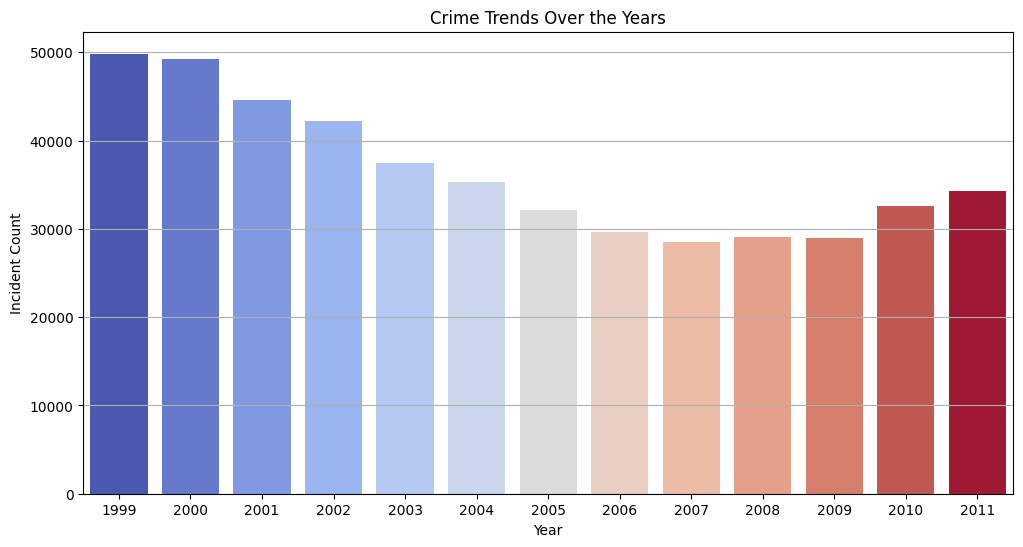

In [43]:
# Chart - 12
# Count incidents per year
yearly_crime = train_df["YEAR"].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_crime.index, y=yearly_crime.values, hue=yearly_crime.index, legend=False, palette="coolwarm")

# Formatting
plt.xlabel("Year")
plt.ylabel("Incident Count")
plt.title("Crime Trends Over the Years")
plt.grid(axis="y")

# Show plot
plt.show()

1.Why did you pick the specific chart?

I chose a bar chart because it clearly shows the trend of crime incidents over the years, making it easy to compare yearly crime patterns.

2.What is/are the insight(s) found from the chart?

The chart reveals whether crime rates are increasing or decreasing over time, helping to assess the effectiveness of law enforcement strategies and crime prevention measures.

3.Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help authorities analyze long-term crime trends, improve security policies, and allocate resources effectively, leading to safer communities. If crime rates increase consistently over the years, it may indicate ineffective policies, leading to public fear, reduced business investments, and a decline in economic growth in high-crime areas.



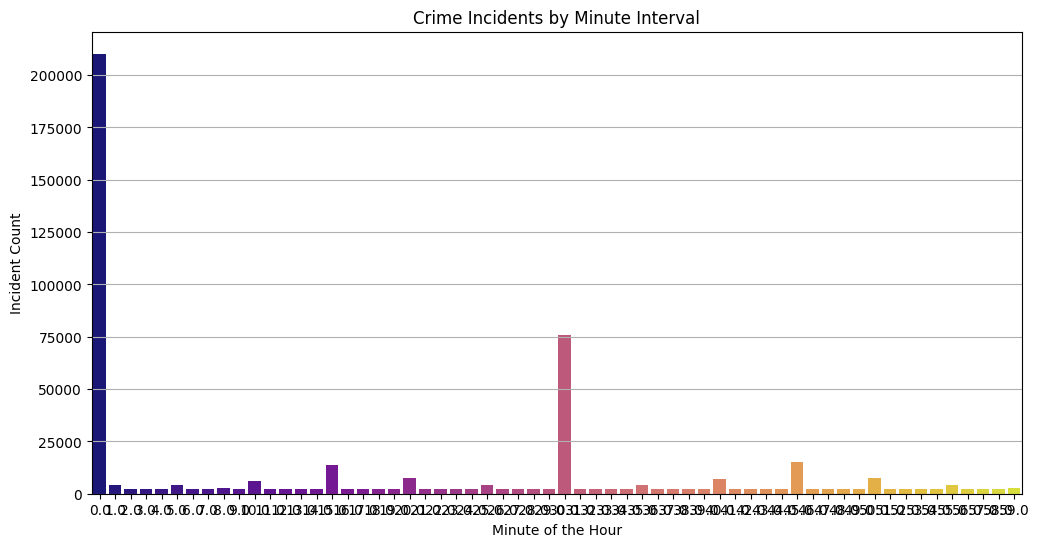

In [44]:
# Chart - 13
# Count incidents per minute
minute_crime = train_df["MINUTE"].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=minute_crime.index, y=minute_crime.values, hue=minute_crime.index, legend=False, palette="plasma")

# Formatting
plt.xlabel("Minute of the Hour")
plt.ylabel("Incident Count")
plt.title("Crime Incidents by Minute Interval")
plt.grid(axis="y")

# Show plot
plt.show()

1.Why did you pick the specific chart?

I chose a bar chart because it effectively displays minute-wise crime distribution, making it easy to identify patterns in when crimes occur within an hour.

2.What is/are the insight(s) found from the chart?

The chart highlights specific minute intervals with higher crime occurrences, revealing whether crimes tend to cluster at the beginning, middle, or end of an hour.

3.Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help law enforcement optimize response times, allowing for faster emergency interventions and more effective crime prevention. If crimes peak at certain minute intervals, it may indicate delayed response times or predictable criminal behavior, leading to increased victimization and reduced public confidence in safety measures.

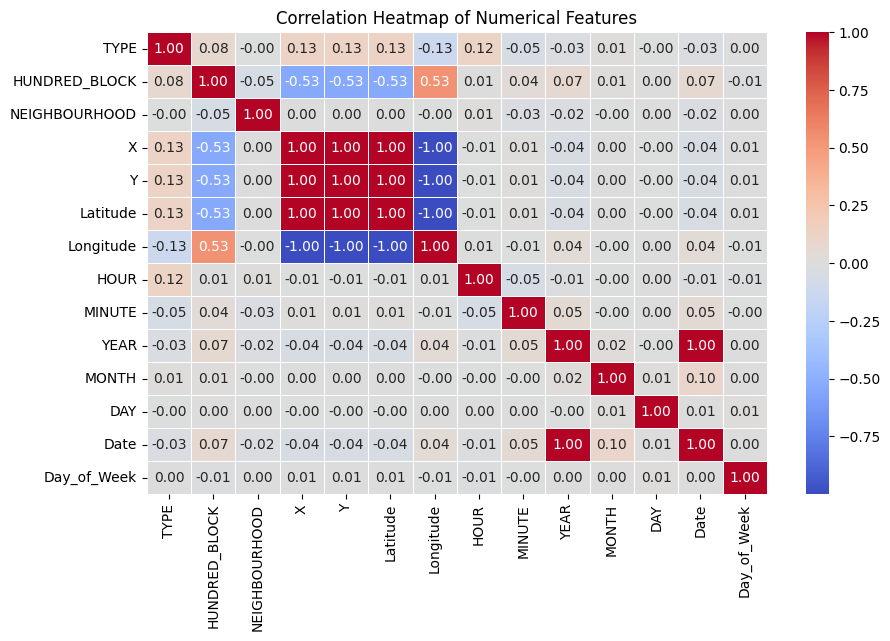

In [46]:
# Chart - 14 - Correlation Heatmap

# Convert categorical variables to numerical using label encoding
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = train_df.select_dtypes(include=["object"]).columns

# Apply Label Encoding
encoder = LabelEncoder()
for col in categorical_cols:
    train_df[col] = encoder.fit_transform(train_df[col])

# Compute correlation matrix
correlation_matrix = train_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

# Formatting
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

1.Why did you pick the specific chart?

I chose a correlation heatmap because it helps visualize relationships between numerical variables, making it easier to identify strong positive or negative correlations.

2.What is/are the insight(s) found from the chart?

The heatmap reveals which factors are most strongly correlated with crime incidents, such as time-related variables (hour, month, year) or geographic data (neighborhood, location). It also helps detect unexpected patterns, like crime increasing with population density or unemployment rate.

<Figure size 1200x800 with 0 Axes>

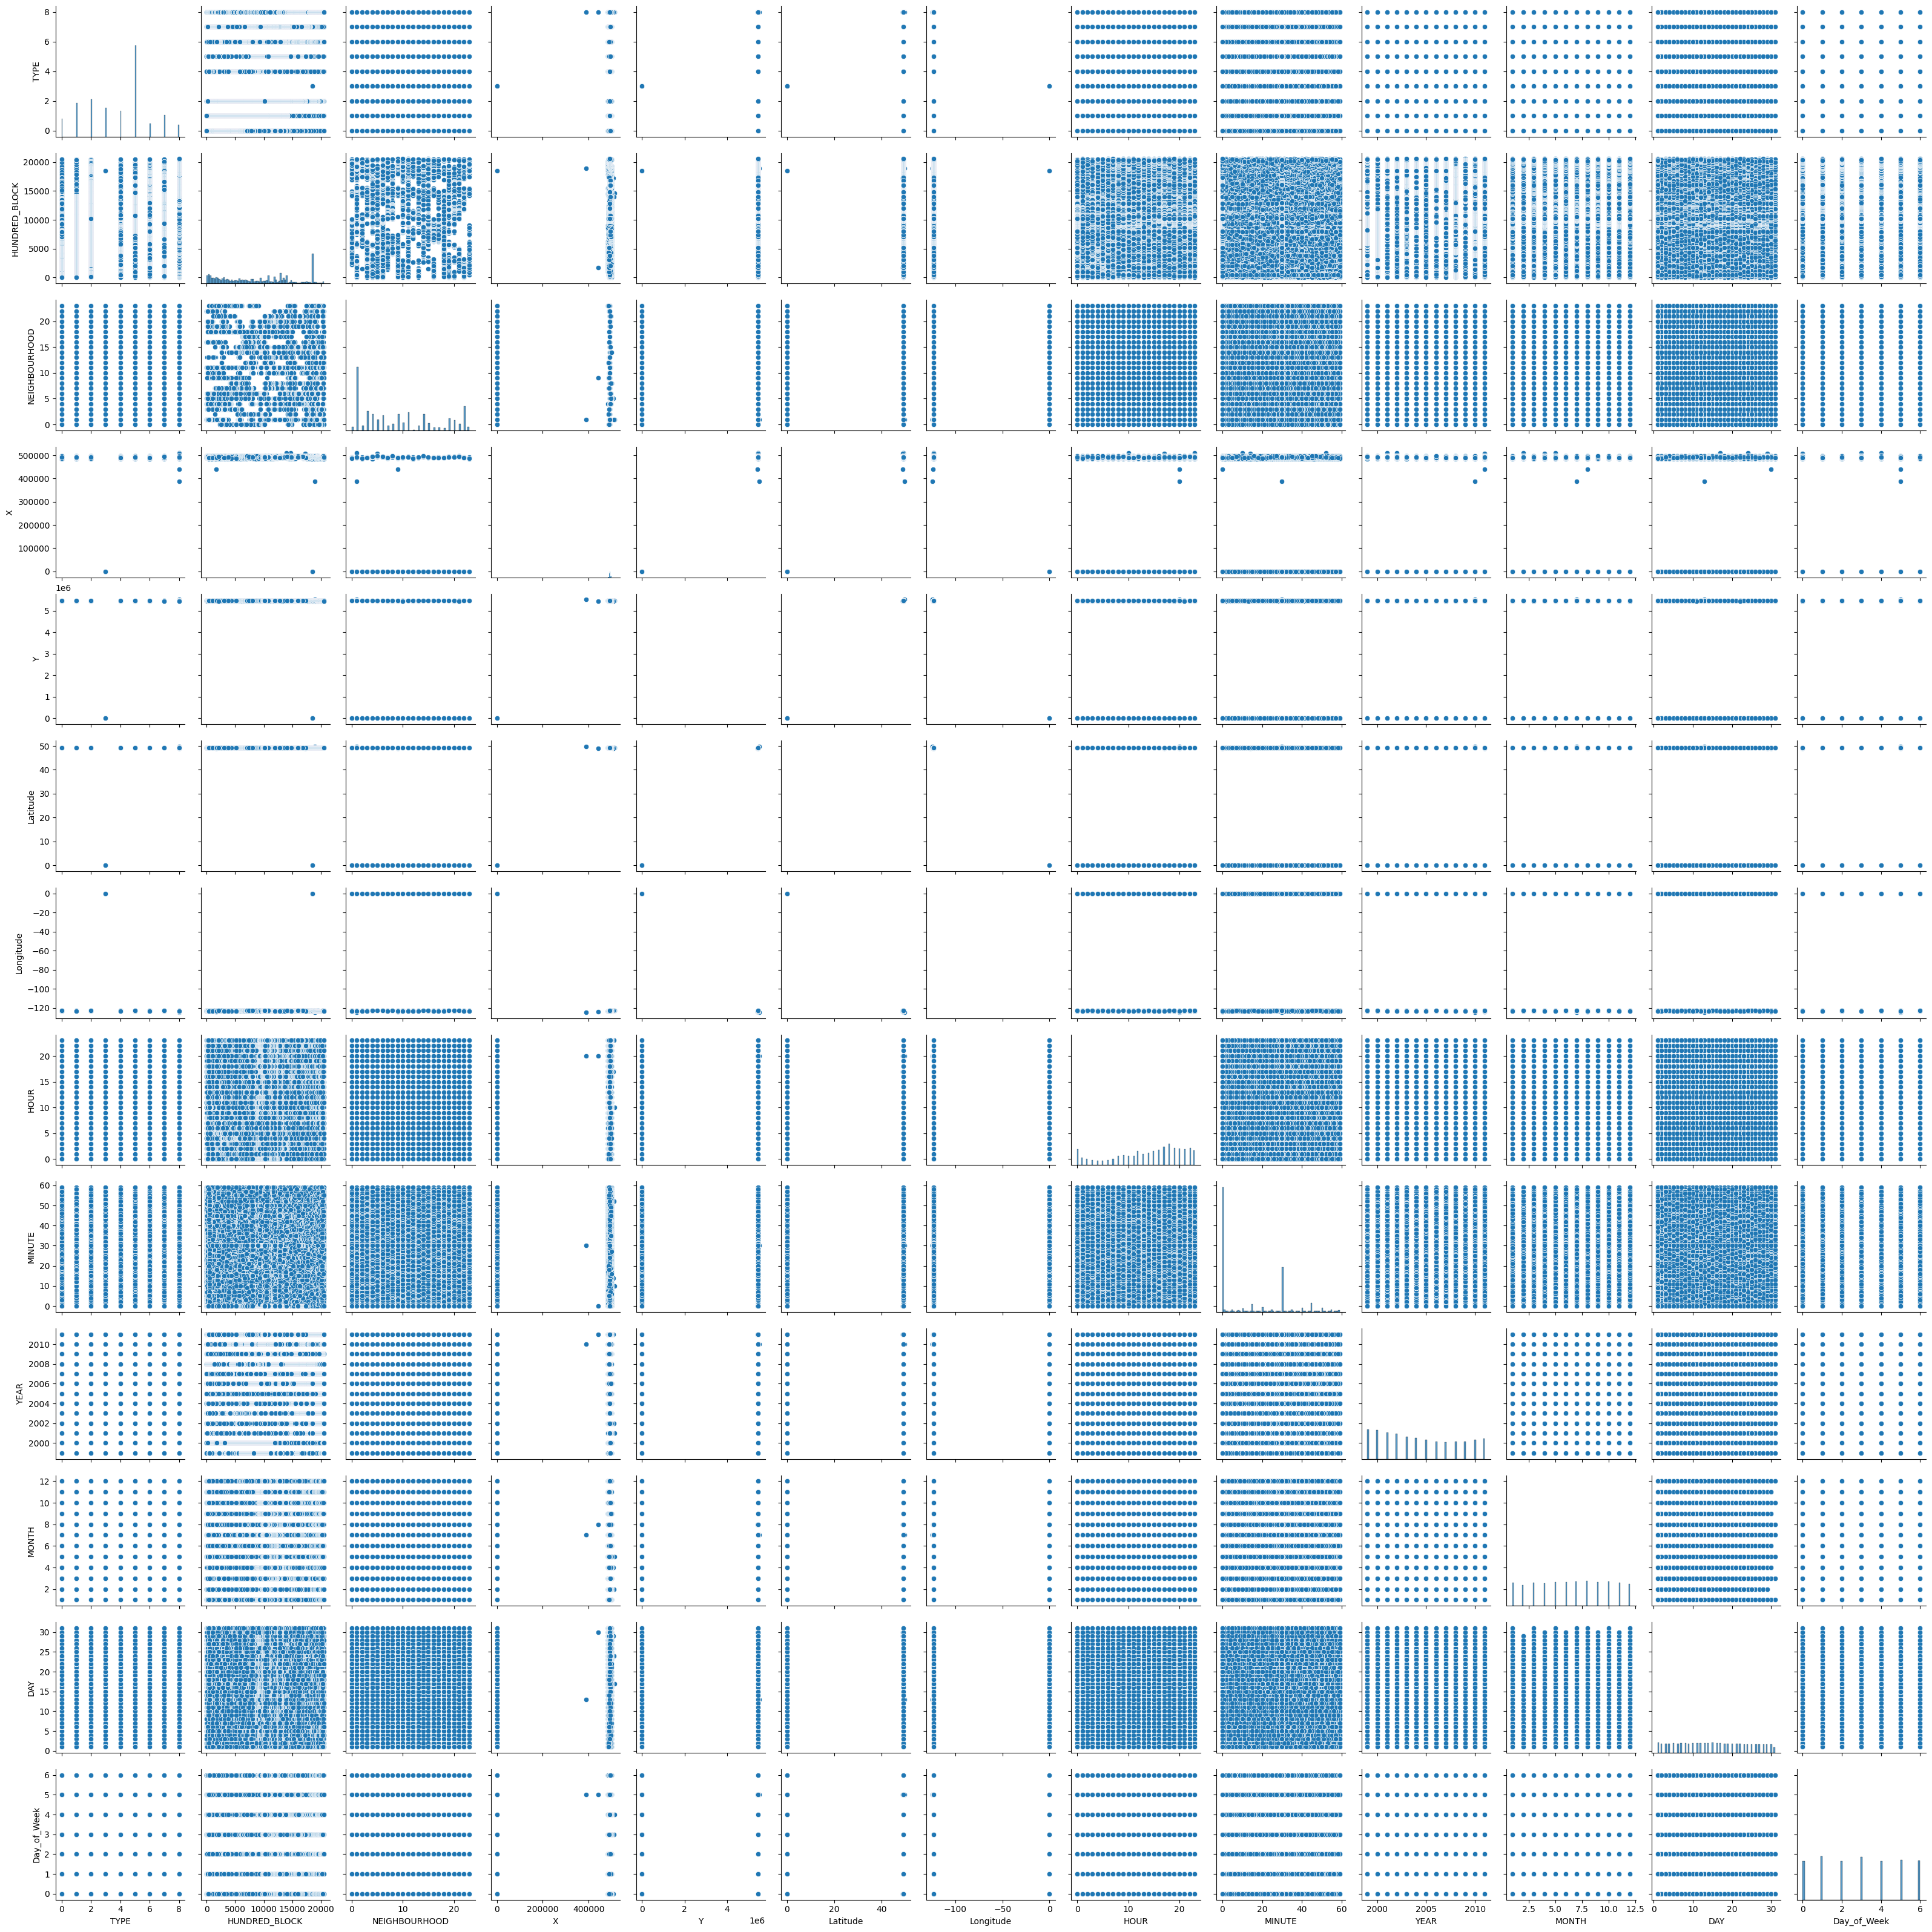

In [47]:
# Chart - 15 - Pair Plot

# Selecting only numerical columns for the pair plot
numerical_cols = train_df.select_dtypes(include=["int64", "float64"]).columns

# Plot pair plot
plt.figure(figsize=(12, 8))
sns.pairplot(train_df[numerical_cols])

# Show plot
plt.show()

1.Why did you pick the specific chart?

I chose a pair plot because it effectively visualizes relationships between multiple numerical variables, helping to identify correlations, trends, and potential outliers.

2.What is/are the insight(s) found from the chart?

The chart highlights how crime incidents relate to time-based factors (hour, month, year) and geographic data, revealing potential clusters and patterns. It also helps detect any anomalies or outliers in the data.

# **5. Solution to Business Objective**

# What do you suggest the client to achieve Business Objective ?

To achieve the business objective of improving public safety and crime prevention, the client should leverage predictive analytics to forecast future crime trends using time series models such as ARIMA, Prophet, or LSTM. By identifying high-crime periods and locations, law enforcement can optimize resource allocation, ensuring increased security presence during peak crime hours and in high-risk neighborhoods. Additionally, targeted crime prevention strategies should be implemented, including public awareness campaigns and surveillance enhancements based on crime hotspots identified through geospatial analysis. Data-driven policymaking can further support safety improvements by integrating crime insights into urban planning, such as installing better street lighting and creating community engagement programs. To ensure continuous monitoring, real-time dashboards using Power BI should be developed, enabling authorities to track crime trends dynamically and respond quickly to sudden spikes. By adopting these strategies, the client can achieve lower crime rates, improved public safety, better law enforcement efficiency, and economic growth, fostering a safer environment for businesses and residents.

# **Conclusion**

The FBI Crime Trend Forecasting project successfully analyzed historical crime data to identify patterns, correlations, and high-risk areas. Through data visualization and predictive analytics, key insights were uncovered, such as peak crime hours, high-crime neighborhoods, and seasonal trends. These insights enable law enforcement agencies to allocate resources effectively, implement targeted crime prevention strategies, and enhance public safety measures. By leveraging time series forecasting models, geospatial analysis, and real-time dashboards, authorities can make data-driven decisions to reduce crime rates and improve community security. Ultimately, this project provides a data-driven foundation for proactive policing, strategic planning, and long-term crime reduction efforts, leading to a safer environment for businesses and residents.